In [0]:
#Setup
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#Importing the latest data from Kaggle
!pip install kaggle
!mkdir .kaggle
import json
token= {"username":"umatv1699","key":"abec8bf1b9079189558a1524b4ea75e4"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d sudalairajkumar/covid19-in-india -p/content
!unzip \*.zip

Individual_Details_url="IndividualDetails.csv"
Individual_Details=pd.read_csv(Individual_Details_url, index_col="id", dayfirst=True, parse_dates=["diagnosed_date","status_change_date"])

mkdir: cannot create directory ‘.kaggle’: File exists
- path is now set to: {/content}
covid19-in-india.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  covid19-in-india.zip
replace AgeGroupDetails.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: AgeGroupDetails.csv     
  inflating: HospitalBedsIndia.csv   
  inflating: ICMRTestingDetails.csv  
  inflating: ICMRTestingLabs.csv     
  inflating: IndividualDetails.csv   
  inflating: StatewiseTestingDetails.csv  
  inflating: covid_19_india.csv      
  inflating: population_india_census2011.csv  


In [5]:
#Importing the data shared with us along with the project problem statement
#To use the data given to us instead of the latest data, uncomment this block and comment the previous Kaggle Block of Code
"""
Individual_Details_url="https://raw.githubusercontent.com/Uma1699/MFDS-Question-3-Datasets/master/IndividualDetails.csv"
Individual_Details=pd.read_csv(covid_19_india_url, dayfirst=True, index_col="Date", parse_dates=True)
"""

'\nIndividual_Details_url="https://raw.githubusercontent.com/Uma1699/MFDS-Question-3-Datasets/master/IndividualDetails.csv"\nIndividual_Details=pd.read_csv(covid_19_india_url, dayfirst=True, index_col="Date", parse_dates=True)\n'

In [6]:
Individual_Details

,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
id,,,,,,,,,,,
0,KL-TS-P1,2020-01-30,20,F,Thrissur,Thrissur,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan
1,KL-AL-P1,2020-02-02,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan
2,KL-KS-P1,2020-02-03,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan
3,DL-P1,2020-03-02,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,2020-03-15,"Travelled from Austria, Italy"
4,TS-P1,2020-03-02,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,2020-03-02,"Travelled from Dubai to Bangalore on 20th Feb,..."
...,...,...,...,...,...,...,...,...,...,...,...
27886,NaN,2020-04-26,NaN,NaN,NaN,NaN,Delhi,NaN,Hospitalized,2020-04-26,Details awaited
27887,NaN,2020-04-26,NaN,NaN,NaN,NaN,Uttarakhand,NaN,Hospitalized,2020-04-26,Details awaited
27888,NaN,2020-04-26,12,F,NaN,Munger,Bihar,NaN,Hospitalized,2020-04-26,Details awaited


In [7]:
#Finding no. of hotspots in each state till March 19th
Individual_Details1=Individual_Details.loc[(Individual_Details.current_status=="Hospitalized") | (Individual_Details.status_change_date>=pd.to_datetime('20/03/2020',format='%d/%m/%Y'))]
hotspots_march_twenty = pd.DataFrame(Individual_Details1.loc[(Individual_Details1.diagnosed_date<pd.to_datetime('20/03/2020',format='%d/%m/%Y'))][["diagnosed_date","detected_city", "detected_district", "detected_state"]])
hotspots_march_twenty = pd.DataFrame(hotspots_march_twenty.groupby(["detected_state","detected_district"]).diagnosed_date.count()).rename(columns={'diagnosed_date': 'cases'})
hotspots_march_twenty = hotspots_march_twenty.loc[hotspots_march_twenty.cases>=10].groupby("detected_state").count().rename(columns={'cases': 'hotspots_0'})
hotspots_march_twenty

,hotspots_0
detected_state,
Haryana,1
Karnataka,1
Maharashtra,1
Telangana,1


In [9]:
#Finding no. of hotspots in each state till March 26th
Individual_Details2=Individual_Details.loc[(Individual_Details.current_status=="Hospitalized") | (Individual_Details.status_change_date>=pd.to_datetime('27/03/2020',format='%d/%m/%Y'))]
hotspots_march_twenty_seven = pd.DataFrame(Individual_Details2.loc[(Individual_Details2.diagnosed_date<pd.to_datetime('27/03/2020',format='%d/%m/%Y'))][["diagnosed_date","detected_city", "detected_district", "detected_state"]])
hotspots_march_twenty_seven = pd.DataFrame(hotspots_march_twenty_seven.groupby(["detected_state","detected_district"]).diagnosed_date.count()).rename(columns={'diagnosed_date': 'cases'})
hotspots_march_twenty_seven = hotspots_march_twenty_seven.loc[hotspots_march_twenty_seven.cases>=10].groupby("detected_state").count().rename(columns={'cases': 'hotspots_1'})
hotspots_march_twenty_seven

,hotspots_1
detected_state,
Gujarat,1
Haryana,2
Karnataka,1
Kerala,4
Ladakh,1
Maharashtra,3
Punjab,1
Rajasthan,1
Tamil Nadu,1


In [10]:
#Finding no. of hotspots in each state till April 3rd
Individual_Details3=Individual_Details.loc[(Individual_Details.current_status=="Hospitalized") | (Individual_Details.status_change_date>=pd.to_datetime('03/04/2020',format='%d/%m/%Y'))]
hotspots_april_third = pd.DataFrame(Individual_Details3.loc[(Individual_Details3.diagnosed_date<pd.to_datetime('03/04/2020',format='%d/%m/%Y'))][["diagnosed_date","detected_city", "detected_district", "detected_state"]])
hotspots_april_third = pd.DataFrame(hotspots_april_third.groupby(["detected_state","detected_district"]).diagnosed_date.count()).rename(columns={'diagnosed_date': 'cases'})
hotspots_april_third = hotspots_april_third.loc[hotspots_april_third.cases>=10].groupby("detected_state").count().rename(columns={'cases': 'hotspots_2'})
hotspots_april_third

,hotspots_2
detected_state,
Andhra Pradesh,7
Chandigarh,1
Delhi,1
Gujarat,4
Haryana,1
Jammu and Kashmir,2
Karnataka,3
Kerala,4
Ladakh,1


In [11]:
#Finding no. of hotspots in each state till April 10th
Individual_Details4=Individual_Details.loc[(Individual_Details.current_status=="Hospitalized") | (Individual_Details.status_change_date>=pd.to_datetime('10/04/2020',format='%d/%m/%Y'))]
hotspots_april_tenth=pd.DataFrame(Individual_Details4.loc[(Individual_Details4.diagnosed_date<pd.to_datetime('10/04/2020',format='%d/%m/%Y'))][["diagnosed_date","detected_city", "detected_district", "detected_state"]])
hotspots_april_tenth = pd.DataFrame(hotspots_april_tenth.groupby(["detected_state","detected_district"]).diagnosed_date.count()).rename(columns={'diagnosed_date': 'cases'})
hotspots_april_tenth = hotspots_april_tenth.loc[hotspots_april_tenth.cases>=10].groupby("detected_state").count().rename(columns={'cases': 'hotspots_3'})
hotspots_april_tenth

,hotspots_3
detected_state,
Andhra Pradesh,11
Bihar,1
Chandigarh,1
Chhattisgarh,1
Delhi,1
Gujarat,7
Haryana,4
Himachal Pradesh,1
Jammu and Kashmir,7


In [12]:
#Combining all the data into one DataFrame
all_hotspots = pd.merge(hotspots_march_twenty, hotspots_march_twenty_seven, how='outer', left_index=True, right_index=True).fillna(0)
all_hotspots = pd.merge(all_hotspots, hotspots_april_third, how='outer', left_index=True, right_index=True).fillna(0)
all_hotspots = pd.merge(all_hotspots, hotspots_april_tenth, how='outer', left_index=True, right_index=True).fillna(0)
all_hotspots

,hotspots_0,hotspots_1,hotspots_2,hotspots_3
detected_state,,,,
Andhra Pradesh,0.0,0.0,7.0,11
Bihar,0.0,0.0,0.0,1
Chandigarh,0.0,0.0,1.0,1
Chhattisgarh,0.0,0.0,0.0,1
Delhi,0.0,0.0,1.0,1
Gujarat,0.0,1.0,4.0,7
Haryana,1.0,2.0,1.0,4
Himachal Pradesh,0.0,0.0,0.0,1
Jammu and Kashmir,0.0,0.0,2.0,7


In [13]:
#Computing change in number of hotspots
all_hotspots["Week_1"] = pd.DataFrame(all_hotspots["hotspots_1"]-all_hotspots["hotspots_0"])
all_hotspots["Week_2"] = pd.DataFrame(all_hotspots["hotspots_2"]-all_hotspots["hotspots_1"])
all_hotspots["Week_3"] = pd.DataFrame(all_hotspots["hotspots_3"]-all_hotspots["hotspots_2"])
all_hotspots

,hotspots_0,hotspots_1,hotspots_2,hotspots_3,Week_1,Week_2,Week_3
detected_state,,,,,,,
Andhra Pradesh,0.0,0.0,7.0,11,0.0,7.0,4.0
Bihar,0.0,0.0,0.0,1,0.0,0.0,1.0
Chandigarh,0.0,0.0,1.0,1,0.0,1.0,0.0
Chhattisgarh,0.0,0.0,0.0,1,0.0,0.0,1.0
Delhi,0.0,0.0,1.0,1,0.0,1.0,0.0
Gujarat,0.0,1.0,4.0,7,1.0,3.0,3.0
Haryana,1.0,2.0,1.0,4,1.0,-1.0,3.0
Himachal Pradesh,0.0,0.0,0.0,1,0.0,0.0,1.0
Jammu and Kashmir,0.0,0.0,2.0,7,0.0,2.0,5.0


Text(0, 0.5, 'Change in no. of hotspots')

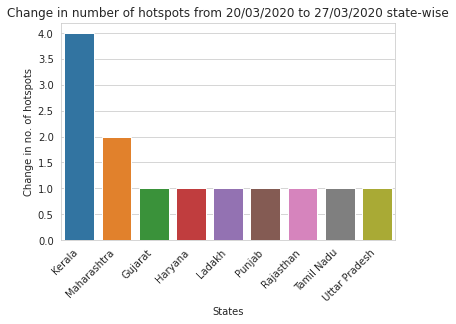

In [14]:
#Displaying change in hotspots over first week
sns.set_style("whitegrid")
fig1, ax1 = plt.subplots(figsize = (6,4))  
sns.barplot(x=all_hotspots.loc[all_hotspots.Week_1>0].sort_values(by="Week_1", ascending=False).index, y=all_hotspots.loc[all_hotspots.Week_1>0].sort_values(by="Week_1", ascending=False).Week_1)
plt.title("Change in number of hotspots from 20/03/2020 to 27/03/2020 state-wise")
ax1.set_xticklabels(labels=all_hotspots.loc[all_hotspots.Week_1>0].sort_values(by="Week_1", ascending=False).index, rotation=45, ha='right')
plt.xlabel("States")
plt.ylabel("Change in no. of hotspots")

Text(0, 0.5, 'Change in no. of hotspots')

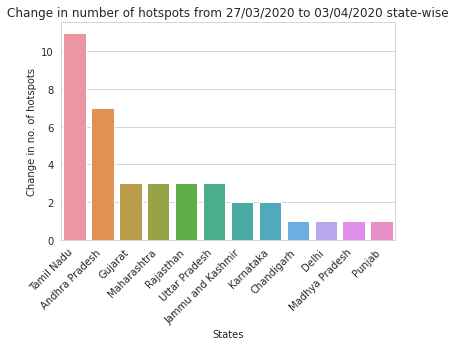

In [15]:
#Displaying change in hotspots over second week
sns.set_style("whitegrid")
fig2, ax2 = plt.subplots(figsize = (6,4))  
sns.barplot(x=all_hotspots.loc[all_hotspots.Week_2>0].sort_values(by="Week_2", ascending=False).index, y=all_hotspots.loc[all_hotspots.Week_2>0].sort_values(by="Week_2", ascending=False).Week_2)
plt.title("Change in number of hotspots from 27/03/2020 to 03/04/2020 state-wise")
ax2.set_xticklabels(labels=all_hotspots.loc[all_hotspots.Week_2>0].sort_values(by="Week_2", ascending=False).index, rotation=45, ha='right')
plt.xlabel("States")
plt.ylabel("Change in no. of hotspots")

Text(0, 0.5, 'Change in no. of hotspots')

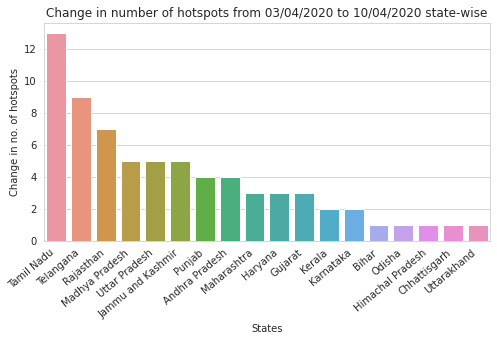

In [16]:
#Displaying change in hotspots over second week
sns.set_style("whitegrid")
fig3, ax3 = plt.subplots(figsize = (8,4))  
sns.barplot(x=all_hotspots.loc[all_hotspots.Week_3>0].sort_values(by="Week_3", ascending=False).index, y=all_hotspots.loc[all_hotspots.Week_3>0].sort_values(by="Week_3", ascending=False).Week_3)
plt.title("Change in number of hotspots from 03/04/2020 to 10/04/2020 state-wise")
ax3.set_xticklabels(labels=all_hotspots.loc[all_hotspots.Week_3>0].sort_values(by="Week_3", ascending=False).index, rotation=40, ha='right')
plt.xlabel("States")
plt.ylabel("Change in no. of hotspots")